In [62]:
## Import Libraries
# install.packages("scatterplot3d",repos = "http://cran.us.r-project.org")

library(plotly)
library(ggplot2) ## Load ggplot2
library('ggthemes') # visualization themes

Sys.setenv("plotly_username"="ismaelcv")
Sys.setenv("plotly_api_key"="mPu4vLCVRK5jM10YwOAl")



### Computer Exercises

#### 1.Use the data in wage1.csv for this exercise

In [4]:
wages <- read.csv("wage.csv")
head(wages)

wage,educ,exper,tenure,nonwhite,female,married,numdep,smsa,northcen,...,trcommpu,trade,services,profserv,profocc,clerocc,servocc,lwage,expersq,tenursq
3.10,11,2,0,0,1,0,2,1,0,...,0,0,0,0,0,0,0,1.131402,4,0
3.24,12,22,2,0,1,1,3,1,0,...,0,0,1,0,0,0,1,1.175573,484,4
3.00,11,2,0,0,0,0,2,0,0,...,0,1,0,0,0,0,0,1.098612,4,0
6.00,8,44,28,0,0,1,0,1,0,...,0,0,0,0,0,1,0,1.791759,1936,784
5.30,12,7,2,0,0,1,1,0,0,...,0,0,0,0,0,0,0,1.667707,49,4
8.75,16,9,8,0,0,1,0,1,0,...,0,0,0,1,1,0,0,2.169054,81,64


a) Use OLS to estimate the equation:

$$log(wage) = \beta_{1} + \beta_{2}educ +\beta_{3}exper + \beta_{4}exper^{2}+\epsilon$$

In [5]:
# run a linear regression
reg <- lm(log(wage)~educ+exper+I(exper^2),wages)
str(reg $ coefficients)

 Named num [1:4] 0.127998 0.090366 0.041009 -0.000714
 - attr(*, "names")= chr [1:4] "(Intercept)" "educ" "exper" "I(exper^2)"


In [6]:
wages$wageclog <- reg$coefficients[1] + reg$coefficients[2]*wages$educ + reg$coefficients[3]*wages$exper + reg$coefficients[4] * wages$exper^2
wages$wagec <- exp(wages$wageclog)
head(wages[,c("wage","wagec")])

wage,wagec
3.10,3.324054
3.24,5.866278
3.00,3.324054
6.00,3.574645
5.30,4.325315
8.75,6.587225


In [7]:
real <- wages[,c("wage","educ","exper")]
real$type <- "Real"

calculated <- wages[,c("wagec","educ","exper")]
calculated$type <- "Calculated"
colnames(calculated)[1] <- "wage"

all <- rbind(real,calculated)

In [64]:
options(repr.plot.width=12, repr.plot.height=20)

p <- plot_ly(all, x = ~educ, y = ~exper, z = ~wage, color = ~type, colors = c('#BF382A', '#0C4B8E'),    height=800,
    width=800,  marker = list(size = 5)) %>%
  add_markers() %>%
  layout(scene = list(xaxis = list(title = 'Education'),
                     yaxis = list(title = 'Experience'),
                     zaxis = list(title = 'Wage')),
                     autosize = T)


embed_notebook(p)

chart_link = plotly_POST(p, filename="scatter")
chart_link

No encoding supplied: defaulting to UTF-8.
Success! Modified your plotly here -> https://plot.ly/~ismaelcv/1


In [24]:
summary(lm(log(wage)~educ+exper+I(exper^2),wages))


Call:
lm(formula = log(wage) ~ educ + exper + I(exper^2), data = wages)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.96387 -0.29375 -0.04009  0.29497  1.30216 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.1279975  0.1059323   1.208    0.227    
educ         0.0903658  0.0074680  12.100  < 2e-16 ***
exper        0.0410089  0.0051965   7.892 1.77e-14 ***
I(exper^2)  -0.0007136  0.0001158  -6.164 1.42e-09 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.4459 on 522 degrees of freedom
Multiple R-squared:  0.3003,	Adjusted R-squared:  0.2963 
F-statistic: 74.67 on 3 and 522 DF,  p-value: < 2.2e-16


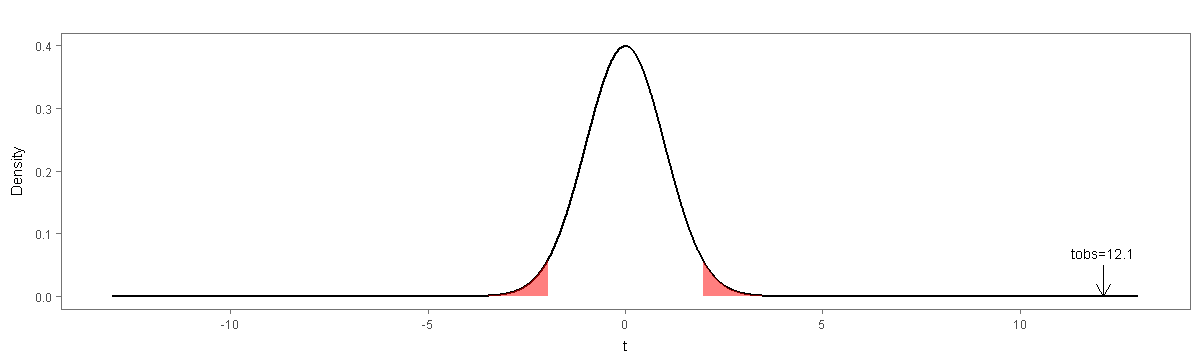

In [60]:
options(repr.plot.width=10, repr.plot.height=3) #Graph sizing in jupyter,for rstudio is not required

x <- seq(-13,13, length = 5000)
dat <- data.frame(x=x, y=dnorm(x))
z=12.10 
right = paste(round(pnorm(abs(z))*100,0),"%",sep="") #pnorm coverts z to a probability
left = paste(round(pnorm(-abs(z))*100,0),"%",sep="") # multiply by 2 for 2 tailed

title = ""
xaxis = 't'
yaxis = 'Density'

d=data.frame(x=c(z), y=c(.05), vx=c(0), vy=c(-.05))



#options(warn=-1)
ggplot(dat, aes(x = x, y = y)) + geom_line(size = 0.7)+scale_y_continuous(limits=c(0,max(dat$y))) +  
    theme_few() + #minimalistic theme
    layer("area", stat="identity", position="identity", 
          mapping = aes(x=ifelse(x<(-1.96),x,NA)),
          params=list(fill="red",alpha=.5, na.rm=TRUE)) + 
    layer("area", stat="identity", position="identity", 
          mapping = aes(x=ifelse(x>(1.96),x,NA)),
          params=list(fill="red",alpha=.5, na.rm=TRUE)) + 
    geom_segment(data=d, mapping=aes(x=x, y=y, xend=x+vx, yend=y+vy), arrow=arrow(length=unit(0.30,"cm"))) +
#     geom_line(aes(x=z),size=.5,colour="blue") + # adds z line
    geom_text(mapping=aes(x2,y2,label = text2), data=data.frame(x2=z, y2=0.07, text2="tobs=12.1"), size=3) +
    ylab(yaxis) + xlab(xaxis) +  ggtitle(title) +  #add titles and axis
    theme(plot.title = element_text(size = 9,hjust = 0.5)) + #title properties
    theme(axis.title.y = element_text(size = 9,hjust = 0.5)) + #y axis properties
    theme(axis.title.x = element_text(size = 9,hjust = 0.5)) +  #x axis properties
    theme(text = element_text(size=9)) #axis font size

In [1]:
log(10)

[1] 2.302585

In [3]:
exp(2.30)

[1] 9.974182